In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,1.0,0.0,0.996187,0.003813,1.0,0.0,0.994352,0.005648,0.999993,6.830878e-06,0.999739,0.000261
1,0,1.0,0.0,0.997862,0.002138,1.0,0.0,0.992838,0.007162,1.000000,1.919964e-07,0.992761,0.007239
2,0,1.0,0.0,0.972539,0.027461,1.0,0.0,0.900241,0.099759,0.938091,6.190850e-02,0.999983,0.000017
3,0,1.0,0.0,0.997957,0.002043,1.0,0.0,0.993480,0.006520,1.000000,8.912391e-09,0.997774,0.002226
4,0,1.0,0.0,0.992268,0.007732,1.0,0.0,0.999229,0.000771,1.000000,4.042073e-45,0.999999,0.000001


In [4]:
data.shape

(20405, 13)

In [5]:
data.columns

Index(['labels', 'dt_prediction_non', 'dt_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'knn_prediction_non',
       'knn_prediction_phish', 'XGB_prediction_non', 'XGB_prediction_phish',
       'mlp_prediction_non', 'mlp_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

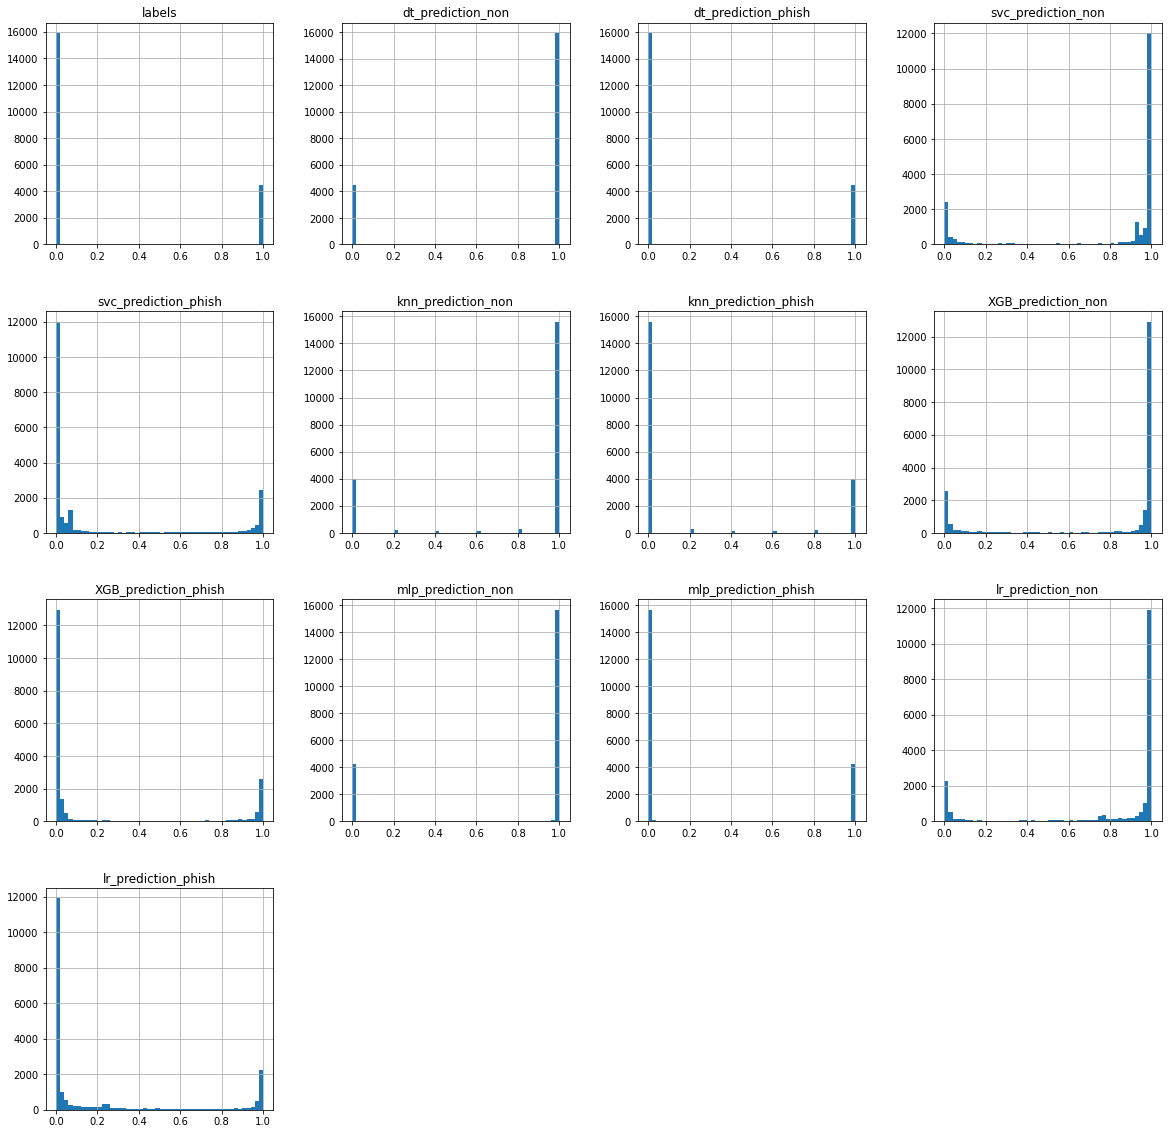

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting the data distribution
data.hist(bins = 50,figsize = (20,20))
plt.show()

In [7]:
data.describe()

,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish,lr_prediction_non,lr_prediction_phish
count,20405.000000,20405.000000,20405.000000,2.040500e+04,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,20405.000000,2.040500e+04,2.040500e+04,2.040500e+04
mean,0.220877,0.781295,0.218705,7.785022e-01,0.221498,0.785729,0.214271,0.779517,0.220483,0.780770,2.192301e-01,7.823608e-01,2.176392e-01
std,0.414848,0.412811,0.412811,3.770340e-01,0.377034,0.400715,0.400715,0.384029,0.384029,0.410267,4.102674e-01,3.633518e-01,3.633518e-01
min,0.000000,0.000000,0.000000,4.438764e-12,0.000005,0.000000,0.000000,0.000118,0.000647,0.000000,0.000000e+00,4.681097e-08,7.267668e-77
25%,0.000000,1.000000,0.000000,8.434588e-01,0.000837,1.000000,0.000000,0.843742,0.001623,0.996587,3.701392e-08,7.590604e-01,8.170269e-04
50%,0.000000,1.000000,0.000000,9.914362e-01,0.008564,1.000000,0.000000,0.993807,0.006193,0.999995,5.150491e-06,9.899917e-01,1.000831e-02
75%,0.000000,1.000000,0.000000,9.991630e-01,0.156541,1.000000,0.000000,0.998377,0.156258,1.000000,3.413026e-03,9.991830e-01,2.409396e-01
max,1.000000,1.000000,1.000000,9.999948e-01,1.000000,1.000000,1.000000,0.999352,0.999882,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(20405, 12) (20405,)


In [10]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_aa(x_train, x_val, y_train, y_val, opt):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=12, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.3777 - accuracy: 0.9229 - val_loss: 0.1683 - val_accuracy: 0.9848
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9857 - val_loss: 0.0663 - val_accuracy: 0.9878
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9887 - val_loss: 0.0435 - val_accuracy: 0.9882
Epoch 4/100
574/574 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9897 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 5/100
574/574 [==============================] - 2s 3ms/step - loss: 0.0344 - accuracy: 0.9903 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 6/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 7/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9909 - val_loss: 0.0301 - val_accuracy: 0.9902

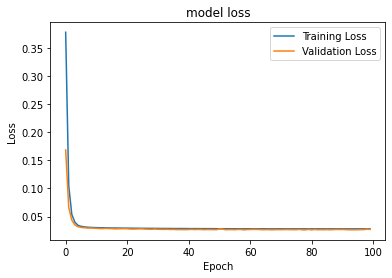

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1585
           1       0.97      0.99      0.98       456

    accuracy                           0.99      2041
   macro avg       0.98      0.99      0.99      2041
weighted avg       0.99      0.99      0.99      2041

Accuracy: 0.9911807937285644
True Positive 451
True Negative 1572
False Positive 13
False Negative 5
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1868 - accuracy: 0.9738 - val_loss: 0.0549 - val_accuracy: 0.9878
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0417 - accuracy: 0.9909 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9907 - val_loss: 0.0354 - val_accuracy: 0.9878
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.0343 -

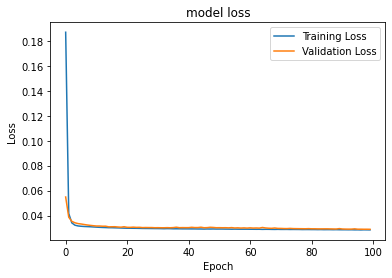

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1557
           1       0.98      0.98      0.98       484

    accuracy                           0.99      2041
   macro avg       0.99      0.99      0.99      2041
weighted avg       0.99      0.99      0.99      2041

Accuracy: 0.9921607055365017
True Positive 476
True Negative 1549
False Positive 8
False Negative 8
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1565 - accuracy: 0.9373 - val_loss: 0.0446 - val_accuracy: 0.9892
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.0332 - val_accuracy: 0.9897
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0303 - 

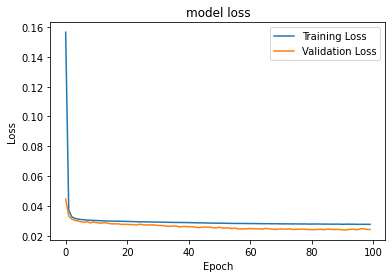

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1614
           1       0.99      0.97      0.98       427

    accuracy                           0.99      2041
   macro avg       0.99      0.99      0.99      2041
weighted avg       0.99      0.99      0.99      2041

Accuracy: 0.9916707496325331
True Positive 416
True Negative 1608
False Positive 6
False Negative 11
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1395 - accuracy: 0.9806 - val_loss: 0.0441 - val_accuracy: 0.9936
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9902 - val_loss: 0.0328 - val_accuracy: 0.9941
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9904 - val_loss: 0.0307 - val_accuracy: 0.9936
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0301 -

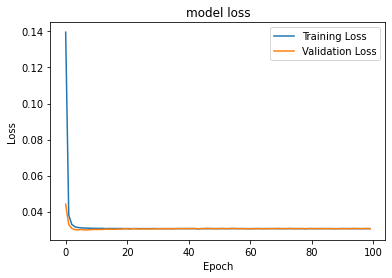

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1605
           1       0.99      0.98      0.98       436

    accuracy                           0.99      2041
   macro avg       0.99      0.99      0.99      2041
weighted avg       0.99      0.99      0.99      2041

Accuracy: 0.9926506614404703
True Positive 427
True Negative 1599
False Positive 6
False Negative 9
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9353 - val_loss: 0.1445 - val_accuracy: 0.9809
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9875 - val_loss: 0.1140 - val_accuracy: 0.9873
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9895 - val_loss: 0.0954 - val_accuracy: 0.9882
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9901 - val_loss: 0.0827 - 

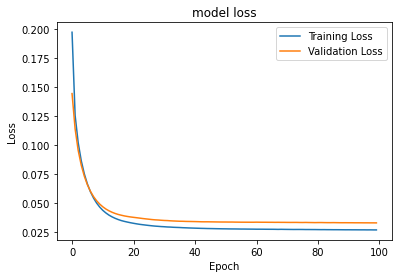

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1595
           1       0.98      0.98      0.98       446

    accuracy                           0.99      2041
   macro avg       0.98      0.99      0.98      2041
weighted avg       0.99      0.99      0.99      2041

Accuracy: 0.9897109260166586
True Positive 436
True Negative 1584
False Positive 11
False Negative 10
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.0827 - accuracy: 0.9887 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9907 - val_loss: 0.0289 

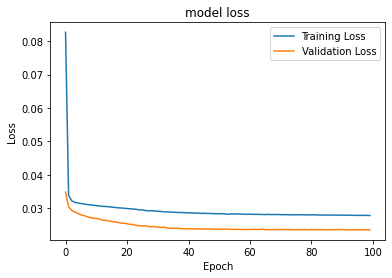

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1570
           1       0.98      0.98      0.98       470

    accuracy                           0.99      2040
   macro avg       0.99      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040

Accuracy: 0.9916666666666667
True Positive 461
True Negative 1562
False Positive 8
False Negative 9
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1046 - accuracy: 0.9738 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9911 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9911 - val_loss: 0.0344 - 

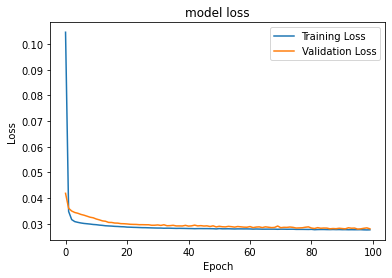

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1598
           1       0.98      0.98      0.98       442

    accuracy                           0.99      2040
   macro avg       0.99      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040

Accuracy: 0.9911764705882353
True Positive 434
True Negative 1588
False Positive 10
False Negative 8
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.0957 - accuracy: 0.9906 - val_loss: 0.0370 - val_accuracy: 0.9912
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0334 - val_accuracy: 0.9912
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0327 - val_accuracy: 0.9912
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0327 -

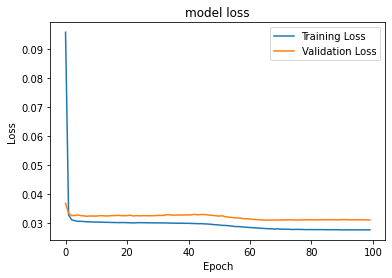

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1606
           1       0.97      0.98      0.98       434

    accuracy                           0.99      2040
   macro avg       0.98      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040

Accuracy: 0.9901960784313726
True Positive 425
True Negative 1595
False Positive 11
False Negative 9
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.4849 - accuracy: 0.8784 - val_loss: 0.3513 - val_accuracy: 0.9926
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.9899 - val_loss: 0.2708 - val_accuracy: 0.9931
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.9905 - val_loss: 0.2190 - val_accuracy: 0.9931
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.9908 - val_loss: 0.1813 -

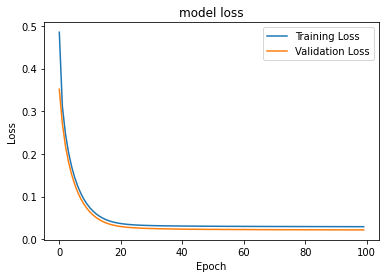

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1594
           1       0.99      0.98      0.98       446

    accuracy                           0.99      2040
   macro avg       0.99      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040

Accuracy: 0.9926470588235294
True Positive 437
True Negative 1588
False Positive 6
False Negative 9
Epoch 1/100
574/574 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9908 - val_loss: 0.0466 - val_accuracy: 0.9907
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9907 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9909 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0374 - 

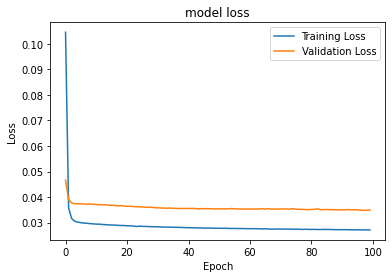

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1574
           1       0.98      0.98      0.98       466

    accuracy                           0.99      2040
   macro avg       0.99      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040

Accuracy: 0.9901960784313726
True Positive 455
True Negative 1565
False Positive 9
False Negative 11
Average Validation Accuracy: 0.9913256189295906


In [11]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

